# Benchmarks and drawings for mappings

SPDX-License-Identifier: 0BSD

In [1]:
import random

from palgoviz.mappings import (
    BinarySearchTree,
    DirectAddressTable,
    HashTable,
    SortedFlatTable,
)

In [2]:
dat = DirectAddressTable(50)
dat[3] = 'foo'
dat[1] = 'bar'
dat[49] = 'baz'
dat

DirectAddressTable(50, {1: 'bar', 3: 'foo', 49: 'baz'})

In [3]:
list(reversed(dat.values()))

['baz', 'foo', 'bar']

In [4]:
def generate_items(count=10**5):  # 10**6 gives bigger speed differences.
    a = list(range(count))
    random.shuffle(a)
    return [(str(x), i) for i, x in enumerate(a)]

In [5]:
%%timeit -n1 items = generate_items()
global ft
ft = SortedFlatTable(items)

1.31 s ± 25 ms per loop (mean ± std. dev. of 7 runs, 1 loop each)


In [6]:
%%timeit -n1 items = generate_items()
global bst
bst = BinarySearchTree(items)

333 ms ± 7.84 ms per loop (mean ± std. dev. of 7 runs, 1 loop each)


In [7]:
%%timeit -n1 items = generate_items()
global ht
ht = HashTable(items)

455 ms ± 18.5 ms per loop (mean ± std. dev. of 7 runs, 1 loop each)


In [8]:
%%timeit -n1 items = generate_items()
global d
d = dict(items)

33.9 ms ± 3.35 ms per loop (mean ± std. dev. of 7 runs, 1 loop each)


In [9]:
%%timeit -n100
ft['22746']

2.05 µs ± 687 ns per loop (mean ± std. dev. of 7 runs, 100 loops each)


In [10]:
%%timeit -n100
bst['22746']

1.88 µs ± 52.9 ns per loop (mean ± std. dev. of 7 runs, 100 loops each)


In [11]:
%%timeit -n100
ht['22746']

1.1 µs ± 283 ns per loop (mean ± std. dev. of 7 runs, 100 loops each)


In [12]:
ft == ht, ht == ft, ft == bst, bst == ft, bst == ht, ht == bst  # All False.

(False, False, False, False, False, False)

In [13]:
ft == HashTable(ft)  # True.

True

In [14]:
ht == SortedFlatTable(ht)  # True.

True

In [15]:
ht == HashTable(list(ht.items()))  # True.

True

In [16]:
bst == BinarySearchTree(HashTable(bst))  # True.

True

In [17]:
%%timeit -n1 items = generate_items(10**6)
global bst
bst = BinarySearchTree(items)

5.41 s ± 285 ms per loop (mean ± std. dev. of 7 runs, 1 loop each)


In [18]:
%%timeit -n1 items = generate_items(10**6)
global ht
ht = HashTable(items)

5.01 s ± 290 ms per loop (mean ± std. dev. of 7 runs, 1 loop each)


In [19]:
small = SortedFlatTable({'y': 20, 'x': 10, 'z': 30})

In [20]:
small

SortedFlatTable({'x': 10, 'y': 20, 'z': 30})

In [21]:
list(reversed(small.items()))

[('z', 30), ('y', 20), ('x', 10)]

In [22]:
SortedFlatTable(_)

SortedFlatTable({'x': 10, 'y': 20, 'z': 30})

In [23]:
small == SortedFlatTable({'x': 10, 'y': 20, 'z': 30})

True

In [24]:
small == SortedFlatTable({'x': 10, 'y': 20, 'z': 31})

False

In [25]:
items = ((c, c.upper()) for c in 'bqdtsvgzprjywnfhclmuxkeiao' * 100)
bst = BinarySearchTree(items, debug=True)
bst

BinarySearchTree({'a': 'A', 'b': 'B', 'c': 'C', 'd': 'D', 'e': 'E', 'f': 'F', 'g': 'G', 'h': 'H', 'i': 'I', 'j': 'J', 'k': 'K', 'l': 'L', 'm': 'M', 'n': 'N', 'o': 'O', 'p': 'P', 'q': 'Q', 'r': 'R', 's': 'S', 't': 'T', 'u': 'U', 'v': 'V', 'w': 'W', 'x': 'X', 'y': 'Y', 'z': 'Z'})

In [26]:
len(bst)

26

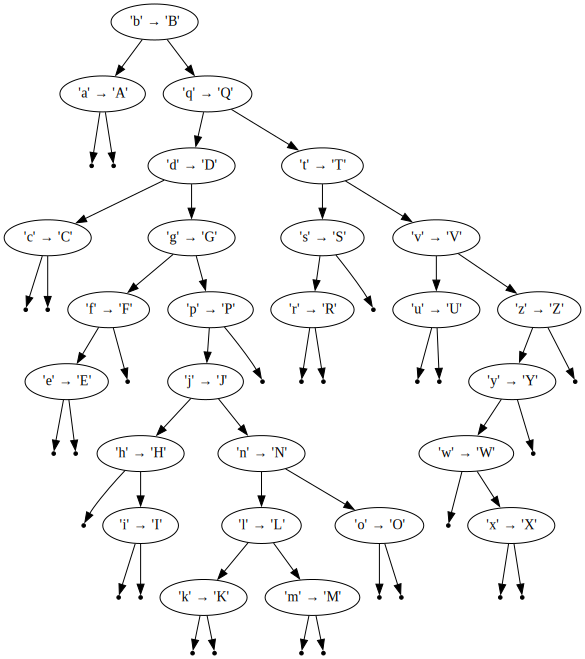

In [27]:
bst.draw()

In [28]:
del bst['j']

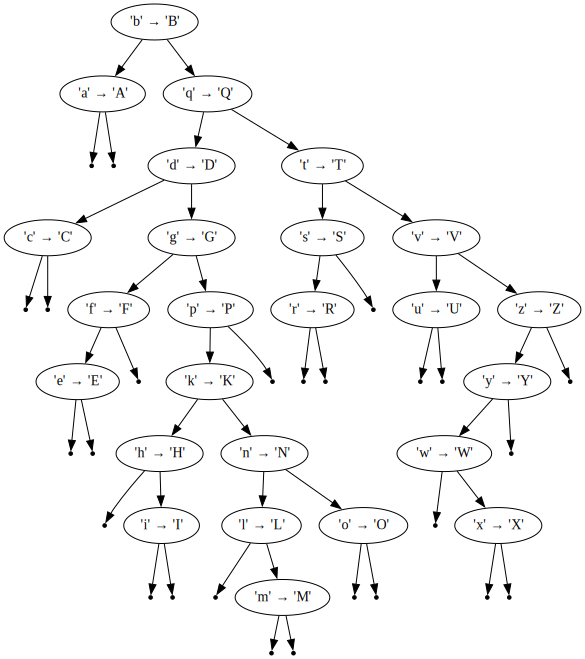

In [29]:
bst.draw()

In [30]:
del bst['v']

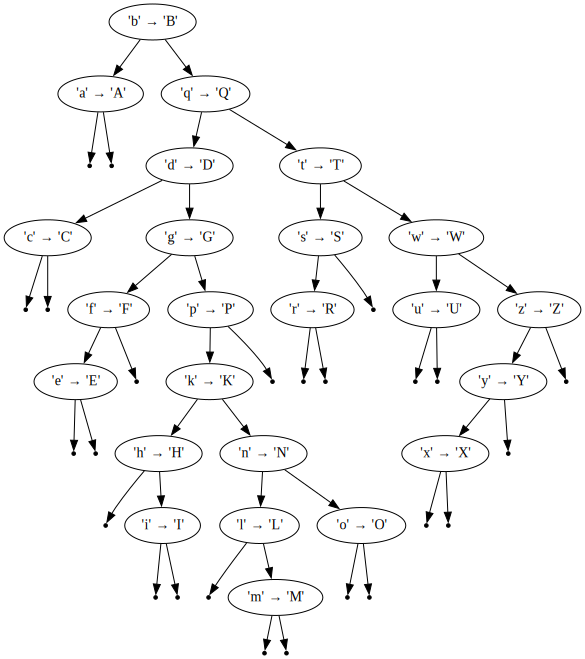

In [31]:
bst.draw()

In [32]:
del bst['b']

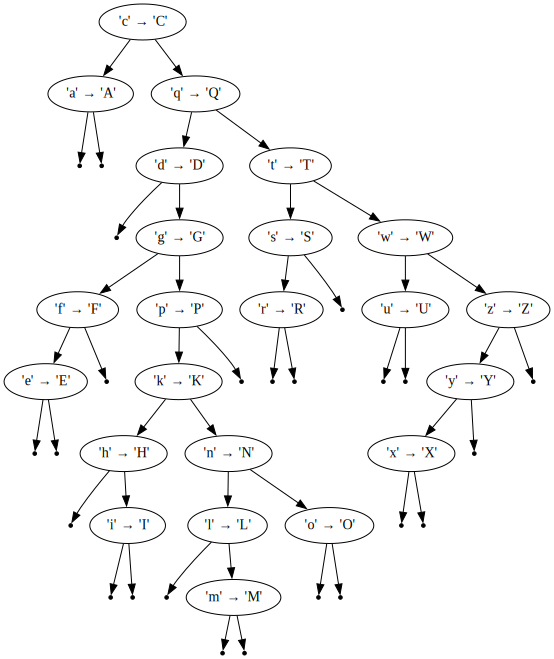

In [33]:
bst.draw()

In [34]:
len(bst)

23

In [35]:
''.join(reversed(bst.values()))

'ZYXWUTSRQPONMLKIHGFEDCA'

In [36]:
's' in bst

True

In [37]:
'v' in bst

False

In [38]:
('s', 'S') in bst.items()

True

In [39]:
('s', 'T') in bst.items()

False